In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn import metrics as m
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

warnings.filterwarnings("ignore")
randomseed = 7

Using TensorFlow backend.


In [2]:
data1 = pd.read_csv("NextYearData_actualData_train.txt")
data2 = pd.read_csv("ThisYearData_actualData_train.txt")
data3 = pd.read_csv("ThisYearData_actualData_test.txt")

data4 = pd.read_csv("NextYearData_actualData_test.txt")

data5 = pd.read_csv("Predicted_NextYearData.txt")
data5.columns = data4.columns

data = pd.concat([data1, data2, data3])

print(data.shape)
data.head()

(74745, 16)


,Unnamed: 0,FIELD_1,FIELD_2,L104600,L103000,S000300,L101700,L100700,FIELD_33,FIELD_38,FIELD_40,FIELD_31,SEX,AGE,L100800,CLASS
0,0,1088387,20160715,6.73,148.0,29.4,38.0,5.6,3.0,0.0,1.0,0.0,0.0,53.0,115.0,1
1,1,137731,20161026,5.37,40.0,21.6,15.0,4.9,1.0,1.0,1.0,0.0,1.0,28.0,83.0,0
2,2,797147,20161123,5.76,176.0,25.9,91.0,4.7,3.0,1.0,0.0,0.0,0.0,43.0,111.0,1
3,3,1155086,20161129,6.13,124.0,29.2,20.0,5.5,1.0,0.0,0.0,1.0,1.0,57.0,98.0,0
4,4,887475,20140711,5.90,187.0,24.5,33.0,5.8,3.0,2.0,1.0,0.0,0.0,44.0,93.0,0


In [43]:
# cols=['L104600_x', 'L103000_x',
#        'S000300_x', 'L101700_x', 'L100700_x', 'FIELD_33_x', 'FIELD_38_x',
#        'FIELD_40_x', 'FIELD_31_x', 'SEX_x', 'AGE_x', 'L100800_x', 
#       'L104600_y', 'L103000_y', 'S000300_y', 'L101700_y',
#        'L100700_y', 'FIELD_33_y', 'FIELD_38_y', 'FIELD_40_y', 'FIELD_31_y',
#        'SEX_y', 'AGE_y', 'L100800_y', 'CLASS_y']

cols=[    'L104600_x','L103000_x','S000300_x','L101700_x','L100700_x','FIELD_33_x','FIELD_38_x','FIELD_40_x',
'FIELD_31_x','SEX_x','AGE_x','L103000_y','S000300_y','L101700_y','L100700_y','FIELD_33_y','FIELD_38_y',
'FIELD_40_y','FIELD_31_y','SEX_y','AGE_y','CLASS_y'
]
#,'L104600_y

In [44]:
traindata = pd.merge(
    data1,data2, how="inner", left_on="Unnamed: 0", right_on="Unnamed: 0"
)
traindata=traindata[cols]
# traindata.head()

In [45]:
testdata = pd.merge(
    data3,data5, how="inner", left_on="Unnamed: 0", right_on="Unnamed: 0"
)
testdata=testdata[cols]
# traindata.head()

In [46]:
# .groupby(by='CLASS_y').size() 

In [47]:

# diabetic_train = diabetic.drop(diabetic_test.index)
# prediabetic_train = prediabetic.drop(prediabetic_test.index).sample(
#     2 * diabetic_train.shape[0], random_state=randomseed
# )
# normal_train = normal.drop(normal_test.index).sample(
#     2 * diabetic_train.shape[0], random_state=randomseed
# )
# train = pd.concat([diabetic_train, diabetic_train, prediabetic_train, normal_train])

In [48]:
# diabetic = testdata[testdata.CLASS_y == 2]
# prediabetic = testdata[testdata.CLASS_y == 1]
# normal = testdata[testdata.CLASS_y == 0]

# print(diabetic.shape[0], prediabetic.shape[0], normal.shape[0])

In [49]:
diabetic = testdata[testdata.CLASS_y == 2]
prediabetic = testdata[testdata.CLASS_y == 1]
normal = testdata[testdata.CLASS_y == 0]

diabetic_test = diabetic
prediabetic_test = prediabetic.sample(diabetic.shape[0], random_state=randomseed)
normal_test = normal.sample(diabetic.shape[0], random_state=randomseed)
testdata = pd.concat([diabetic_test, prediabetic_test, normal_test]) 


In [50]:
# diabetic_test = diabetic.sample(200, random_state=randomseed)
# prediabetic_test = prediabetic.sample(200, random_state=randomseed)
# normal_test = normal.sample(200, random_state=randomseed)
# test = pd.concat([diabetic_test, prediabetic_test, normal_test])

# diabetic_train = diabetic.drop(diabetic_test.index)
# prediabetic_train = prediabetic.drop(prediabetic_test.index).sample(
#     2 * diabetic_train.shape[0], random_state=randomseed
# )
# normal_train = normal.drop(normal_test.index).sample(
#     2 * diabetic_train.shape[0], random_state=randomseed
# )
# train = pd.concat([diabetic_train, diabetic_train, prediabetic_train, normal_train])

In [51]:
data=traindata
diabetic = data[data.CLASS_y == 2]
prediabetic = data[data.CLASS_y == 1]
normal = data[data.CLASS_y == 0]

diabetic_train  = diabetic
prediabetic_train = prediabetic .sample(
    2 * diabetic_train.shape[0], random_state=randomseed
)
normal_train = normal. sample(
    2 * diabetic_train.shape[0], random_state=randomseed
)
train = pd.concat([diabetic_train, diabetic_train, prediabetic_train, normal_train])

In [52]:
# traindata.groupby(by='CLASS_y').size() 

In [53]:
# xtrain = train.iloc[:, 3:-2]
# ytrain = train.iloc[:, -1]
# xtest = test.iloc[:, 3:-2]
# ytest = test.iloc[:, -1]

xtrain = traindata.iloc[:, :-1]
ytrain = traindata.iloc[:, -1]
xtest = testdata.iloc[:, :-1]
ytest = testdata.iloc[:, -1]


In [54]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)


In [55]:
# x = data.iloc[:, 3:-2]
# y = data.iloc[:, -1]

# xtrain, xtest, ytrain, ytest = train_test_split(
#     x, y, random_state=randomseed, test_size=0.2
# )

# sm = SMOTE(random_state=randomseed)
# X_res, y_res = sm.fit_resample(xtrain, ytrain)

# print("Resampled dataset shape %s" % Counter(y_res))
# print(
#     y_res[y_res == 0].shape[0], y_res[y_res == 1].shape[0], y_res[y_res == 2].shape[0]
# )
# print(X_res.shape, y_res.shape)

# xtrain = X_res
# ytrain = y_res

# # y_res2 = y_res.copy()
# # from keras.utils import to_categorical
# # y_res2 = to_categorical(y_res)

# # xtrain, xtest, ytrain, ytest = train_test_split(
# #     X_res, y_res2, random_state=randomseed, test_size=0.2
# # )

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=randomseed,
    n_estimators=100,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features="auto",
)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

0.42250530785562634


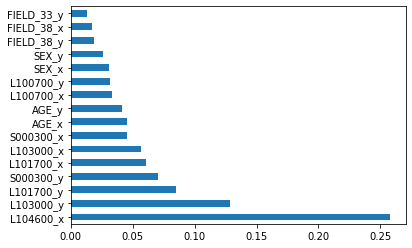

Index(['L104600_x', 'L103000_y', 'L101700_y', 'S000300_y', 'L101700_x',
       'L103000_x', 'S000300_x', 'AGE_x', 'AGE_y', 'L100700_x', 'L100700_y',
       'SEX_x', 'SEX_y', 'FIELD_38_y', 'FIELD_38_x', 'FIELD_33_y'],
      dtype='object')


In [57]:
ypred = rf.predict(xtest)

score = rf.score(xtest, ytest)
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=testdata.iloc[:, :-1].columns)
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)

In [58]:
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

confmatrx = pd.DataFrame(m.confusion_matrix(ytest, ypred))
confmatrx.head()

Accuracy on training set: 0.816
Accuracy on test set: 0.423


,0,1,2
0,144,13,0
1,112,45,0
2,27,120,10


In [59]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.51      0.92      0.65       157
           1       0.25      0.29      0.27       157
           2       1.00      0.06      0.12       157

    accuracy                           0.42       471
   macro avg       0.59      0.42      0.35       471
weighted avg       0.59      0.42      0.35       471



In [60]:
import xgboost as xgb
from sklearn import metrics as m

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=randomseed)

xgb_model.fit(xtrain, ytrain)

y_pred = xgb_model.predict((xtest))

print("accuracy \t", m.accuracy_score(ytest, y_pred))
confmatrx = pd.DataFrame(m.confusion_matrix(ytest, y_pred))
confmatrx.head()

accuracy 	 0.4543524416135881


,0,1,2
0,143,14,0
1,111,46,0
2,21,111,25


In [21]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      5741
           1       0.63      0.30      0.41      2407
           2       0.82      0.30      0.44       157

    accuracy                           0.74      8305
   macro avg       0.74      0.51      0.56      8305
weighted avg       0.72      0.74      0.71      8305



In [ ]:
# =====================================

tempdata=data5

diabetic = tempdata[tempdata.CLASS == 2]
prediabetic = tempdata[tempdata.CLASS == 1].sample(diabetic.shape[0],random_state=0)
normal = tempdata[tempdata.CLASS == 0].sample(diabetic.shape[0],random_state=0)

tempdata5=pd.concat([diabetic,prediabetic,normal])
tempdata5.iloc[:, 3:-2]=scaler.transform(tempdata5.iloc[:, 3:-2])

pred5 = rf.predict((tempdata5.iloc[:, 3:-2]))
print(m.accuracy_score(tempdata5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(tempdata5.iloc[:, -1], pred5))
confmatrx

In [ ]:
print(classification_report(tempdata5.iloc[:, -1], pred5))

In [ ]:
#xgboost test

In [ ]:
tempdata5Rcolumns=tempdata5.iloc[:, 3:-2]
tempdata5Rcolumns.columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
pred5 = xgb_model.predict((tempdata5Rcolumns))
print(m.accuracy_score(tempdata5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(tempdata5.iloc[:, -1], pred5))
confmatrx

In [ ]:
print(classification_report(tempdata5.iloc[:, -1], pred5))


In [ ]:
# ========================================================

In [ ]:
import pickle

with open('_DiabeticClassifierModelForNextYear_rf_model', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
with open('_DiabeticClassifierModelForNextYear_scaler', 'wb') as f:
    pickle.dump(scaler, f)